### CLASSIFICATION NEURAL NETWORKS


My goal here is to implement different Neural Networks with TensorFlow and to study how accurately they predict the nature of my inputs.
Many evaluation criterions will be introduced as well as plots that will bring a clear visualization of our models performances. 
I have decided here to work exclusively on binary classification Neural Newtorks.

In [3]:
# I am going to work with circular data.

from sklearn.datasets import make_circles

# Make 1000 examples 
n_samples = 1000

# Create circles 
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [4]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

X.shape = (1000, 2). 
y.shape = (1000,). 
It means we are working here with two features per training input.

According to the results, y is indeed a binary label but the data is hard to understand. Let's visualize it.

In [5]:
# X[:, 0] : all items on the first row of X
# X[:, 1] : all items on the second row of X

import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


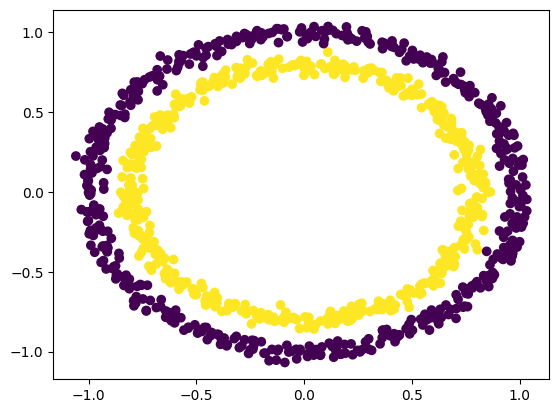

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y)

It's a circular data and each input row and each label (not shown) are NumPy arrays. It's not a problem since TensorFlow adapts itself to these kind of objects. Let's start to model our different Neural Networks and work on them!

In [8]:
# Model 1 (No hidden layer)

import tensorflow as tf 

tf.random.set_seed(42) # Random seed

# Creation of the model

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])
              

model_1.fit(X, y, epochs = 200, verbose=0)

In [9]:
# Let's evaluate its performance

model_1.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - accuracy: 0.4852 - loss: 0.6927


[0.6932879686355591, 0.4729999899864197]

We notice that it has an accuracy of only 0.48! It is as if the model was guessing the label. It definitely needs improvements but before testing other models, I am going to introduce a visual criterion that will give me hints on my model's performance : the plot decision boundary. 

The following code has been borrowed from CS231n Neural Networks Case Study. I have adapted it here for my case and I will use it for many other models.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step
doing binary classification


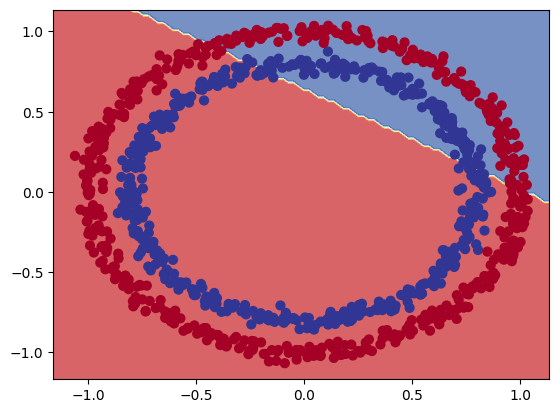

In [11]:
import numpy as np

def plot_decision_boundary(model, X, y):
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:,0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Create X value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


# Check out the predictions our model is making
plot_decision_boundary(model=model_1, X=X, y=y)

Visually, we see that the model performs very poorly since its boundary is linear while the data is circular. It wrongly predicts the vast majority of blue points to be red. It is of upmost importance to generate other models that will solve this issue.

In [22]:
# Model 2 (One hidden layer this time and still no activation function)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_2.fit(X, y, epochs=100, verbose=0)

In [23]:
# Let's evaluate it.

model_2.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - accuracy: 0.4955 - loss: 0.6936


[0.6932631134986877, 0.5]

We notice that the model is still performing badly : only 0.495 accuracy and we would like the loss to be much lower. Many improvements could be made : training the model for longer (more epochs), adding more layers and introducing activation functions, changing optimization functions ...

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step
doing binary classification


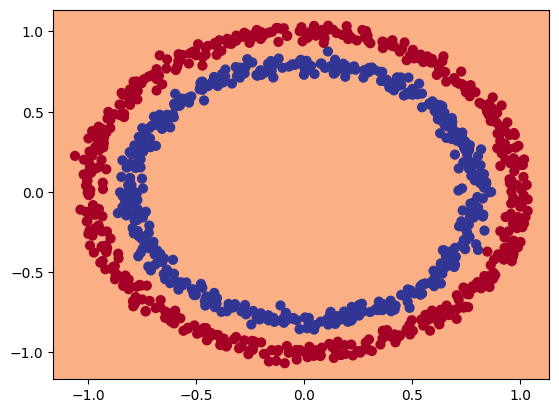

In [24]:
# Before working on another model, let's visualize its plot decision boundary. 

plot_decision_boundary(model=model_2, X=X, y=y)

At first it looked suspicious to me because there is not even a boundary! I have checked that I was compiling the right model and no problems have been found. It seems that the model fails completely to distinguish the two classes of object. It is unable to separate the data. Maybe the SGD optimization function is not well-suited for this kind of problems.
Let's work on another model.

In [ ]:
# Model 3 (Two hidden layers with an actoivation function)

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

history_3 = model_3.fit(X, y, epochs=100, verbose=1)

In [17]:
# Let's evaluate it

model_3.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - accuracy: 0.9995 - loss: 0.0104


[0.00959191843867302, 0.9990000128746033]

Contrary to the previous models, its accuracy is nearly perfect and its loss is tiny. This tremendous improvement is surely due to the adding of two hidden layers (one of which has an activation relu function) and the changing of the optimization function (SGD to Adam).

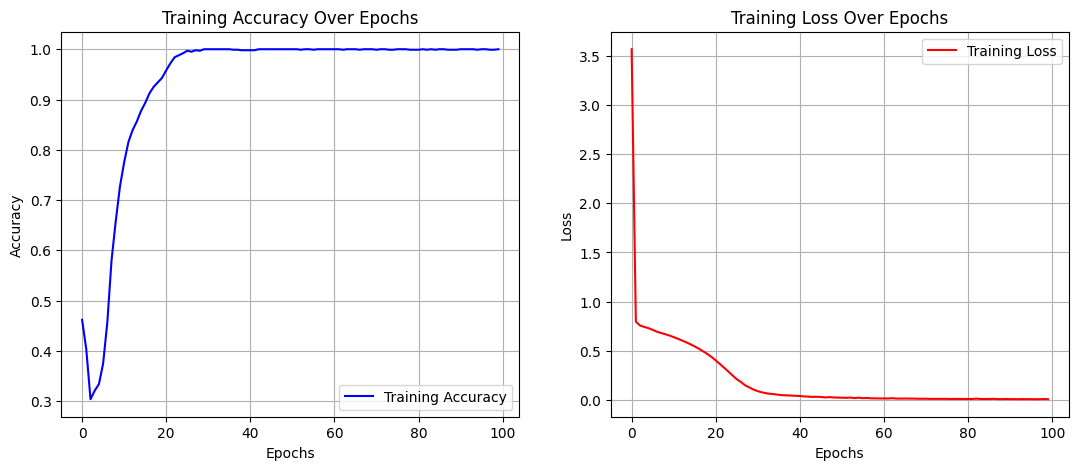

In [18]:
# Let's visualize its training accuracy and its training loss over epochs.

import matplotlib.pyplot as plt
import pandas as pd


history_dict = history_3.history  # Extract the history dictionary
history_df = pd.DataFrame(history_dict) # Dataframe conversion for better visualization
fig, ax = plt.subplots(1, 2, figsize=(13, 5))  # Two subplots


ax[0].plot(history_df["accuracy"], label="Training Accuracy", color="blue")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")
ax[0].set_title("Training Accuracy Over Epochs")
ax[0].legend()
ax[0].grid()


ax[1].plot(history_df["loss"], label="Training Loss", color="red")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
ax[1].set_title("Training Loss Over Epochs")
ax[1].legend()
ax[1].grid()


plt.show()

We notice that the model is already performing extremely well after only 30 epochs.

In [39]:
# Let's now visualize its plot decision boundary to see how different it is from the two previous models. 

import numpy as np

def plot_decision_boundary(model, X, y):
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:,0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Create X value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step
doing binary classification


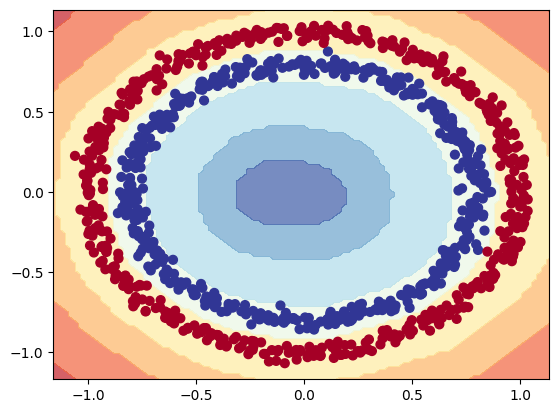

In [40]:
# Check out the predictions our model is making on the third model

plot_decision_boundary(model=model_3, X=X, y=y)

Look at how the boundaries fit much more the circular structure of the data. It is day and night compared to the two previous models. Still, we would like the blue concentrations to fit much better the blue points, same for the red. The colors need to be clearer and closer to the points. This will be the objective of next sections.


 Something is intriguing : on the first model's decision plot, a straight line was visible, which makes me wonder if it could perform well on regression problems. It will be the main objective of the following section. 

## SUB-SECTION ON REGRESSION PROBLEMS

In [26]:
# Let's first create some data to use with my regression models.
# This time, I am splitting the data between training and testing data. It wasn't the case in the previous models where I fitted models on the entire data. 

tf.random.set_seed(42)

# Create some regression data (both have shape=(200,))
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)  # y = X + 100

# Split our training data between training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [ ]:
# To compile my second model with this data, I have to change the loss function (Binary Cross Entropy is well-suited for Binary classification)

import numpy as np

tf.random.set_seed(42)

# I have to reshape my regression training data because they are NumPy one-dimension arrays and TensorFlow expects 2D objects.

X_reg_train = np.array(X_reg_train).reshape(-1, 1)
y_reg_train = np.array(y_reg_train).reshape(-1, 1)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_2.fit(X_reg_train, y_reg_train, epochs=100)

In [29]:
# Let's make predictions with our trained model.

y_reg_preds = model_2.predict(X_reg_test)
y_reg_preds

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[ 876.92615],
       [ 882.7036 ],
       [ 888.481  ],
       [ 894.2586 ],
       [ 900.036  ],
       [ 905.81335],
       [ 911.5909 ],
       [ 917.3683 ],
       [ 923.146  ],
       [ 928.9233 ],
       [ 934.7008 ],
       [ 940.4783 ],
       [ 946.2558 ],
       [ 952.03326],
       [ 957.81067],
       [ 963.58813],
       [ 969.36554],
       [ 975.1431 ],
       [ 980.9206 ],
       [ 986.69794],
       [ 992.4756 ],
       [ 998.253  ],
       [1004.03046],
       [1009.80786],
       [1015.58527],
       [1021.3629 ],
       [1027.1404 ],
       [1032.9178 ],
       [1038.6952 ],
       [1044.4728 ],
       [1050.2502 ],
       [1056.0277 ],
       [1061.805  ],
       [1067.5826 ],
       [1073.3601 ],
       [1079.1375 ],
       [1084.915  ],
       [1090.6924 ],
       [1096.47   ],
       [1102.2476 ],
       [1108.025  ],
       [1113.8025 ],
       [1119.5798 ],
       [1125.3574 ],
       [1131.1346 ],
       [1136.9124 ],
       [1142.6896 ],
       [1148.

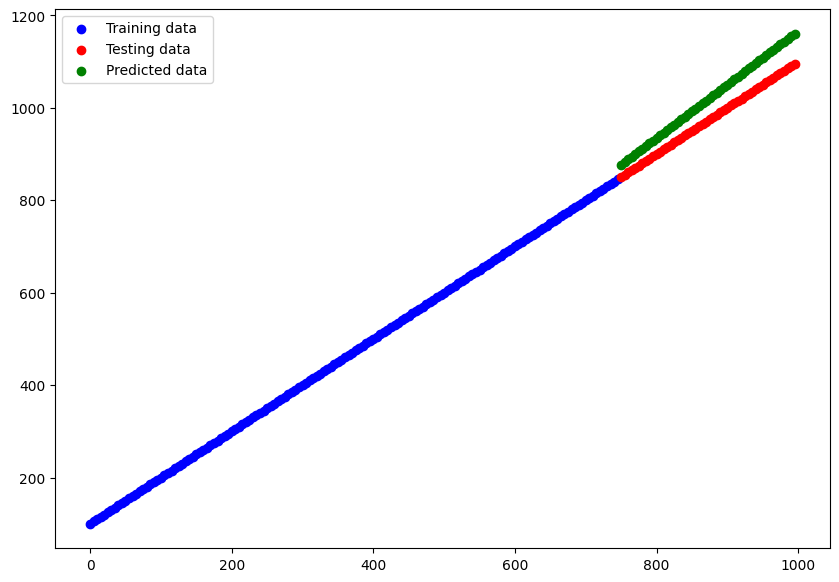

In [31]:
# Now I would like to visualy see how the model's predictions compare to the regression testing data. 

plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="r", label="Testing data")
plt.scatter(X_reg_test, y_reg_preds, c="g", label="Predicted data")
plt.legend()
plt.show()

What we notice is insightful : the model 2 is actually predicting satisfying results on my regression problems whereas it performed atrocely on circular data. The underlying point here is NON-LINEARITY.

https://www.youtube.com/watch?v=s-V7gKrsels&t=85s 

## BACK TO OUR CLASSIFICATION NEURAL NETWORKS

Although our third model draws good results (loss and accuracy criterions), its plot decision boundary isn't precise enough. The goal of the following models will be to try to exhibate Neural Networks that will solve this issue.

In [ ]:
# Model 4 (No hidden layers and introduction of learning rates)

tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history_4 = model_4.fit(X, y, epochs=100)

In [35]:
# let's evaluate our model.

model_4.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4955 - loss: 1.0332 


[1.025144338607788, 0.5]

Really bad accuracy (it was expected). Can't stress enough the importance of activation functions, despite the presence of a learning rate.

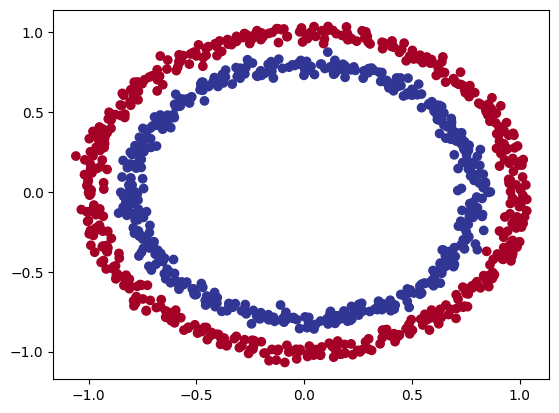

In [37]:
# Let's visualize the two first data rows and the label response to them.

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 199us/step
doing binary classification


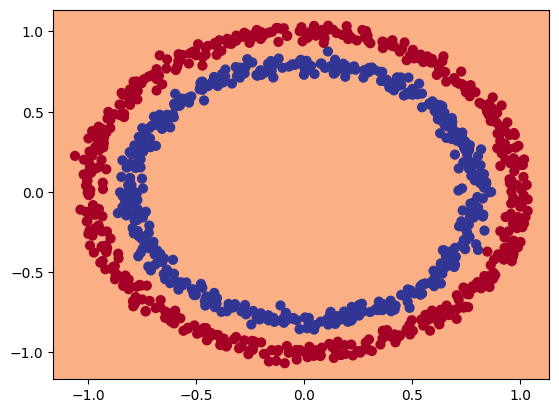

In [41]:
# Let's now plot its decision boundary. 

plot_decision_boundary(model=model_4, X=X, y=y)

Absolutely unable to separate different class objects. The missing point here is the activation functions.

In [ ]:
# Model 5 (Multilayer Neural Network)

tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history_5 = model_5.fit(X, y, epochs=200)

In [47]:
# Evaluation of model 5

model_5.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - accuracy: 0.8301 - loss: 0.3929


[0.3888864815235138, 0.8410000205039978]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step
doing binary classification


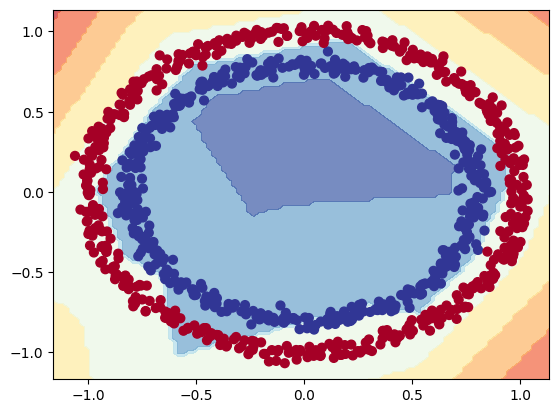

In [45]:
# Let's see its decision boundary

plot_decision_boundary(model=model_5, X=X, y=y)

That's much much better than the previous models. Look at how the blue background is coming closer and closer to the blue points. It is as if it is learning accurately to dissociate red and blue points. Few errors, despite having a less precise accuracy than model 3.

In [ ]:
# Model 6 (same learning rate than model 5, more epochs)

# Let's change the activation function to see how this changes the model's performance.

tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history_6 = model_6.fit(X, y, epochs=500)

In [50]:
# Model 6 evaluation

model_6.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - accuracy: 0.9956 - loss: 0.0143


[0.013210300356149673, 0.9959999918937683]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step
doing binary classification


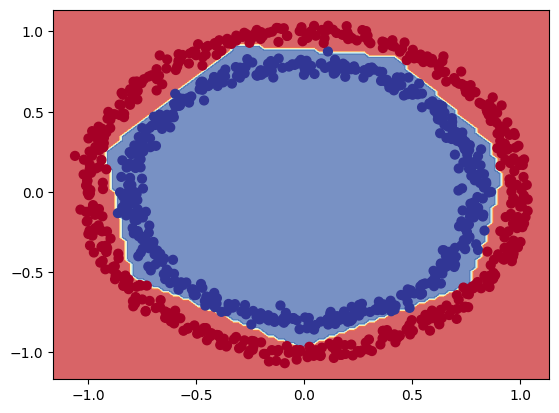

In [51]:
# Let's visualize its decision boundary.

plot_decision_boundary(model=model_6, X=X, y=y)

There is a real difference with the decision boundary from model 5. Here, the model really accurately dissociates the objects. The color shades are much more concentrated. Only few mistakes on the points that are near the white delimitation. So far, this is the best model and it is backed by its accuracy and loss scores.

All along these different models, we have worked on the whole data to evaluate models. From now, we are going to split the data between training and testing data.

In [53]:
# Introduction of the data 

X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
# Model 7 (the learning rate is greater than in model 6, which means that the model is learning faster)
# I recall that this model is trained only on the training data (contrary to previous models)

tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

history_7 = model_7.fit(X_train, y_train, epochs=25)

In [57]:
# Evaluation of model 7

model_7.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9962 - loss: 0.0557 


[0.06957878172397614, 0.9900000095367432]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 222us/step
doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 214us/step
doing binary classification


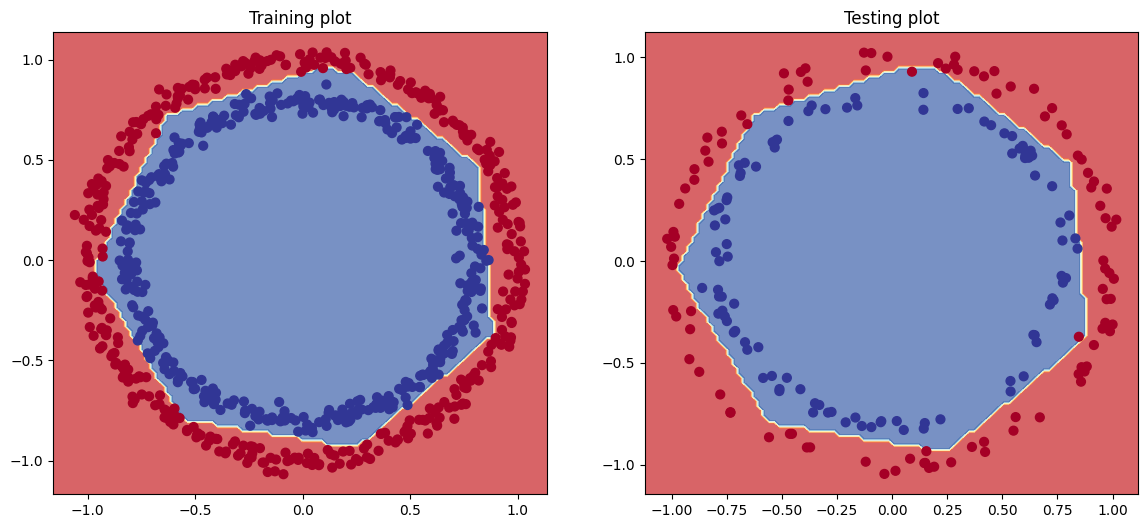

In [59]:
# Plotting of the decision boundaries for the training and testing sets. 

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1) # 1 row, 2 columns, first value (training plot)
plt.title("Training plot")
plot_decision_boundary(model_7, X=X_train, y=y_train)
plt.subplot(1, 2, 2) # the second value (testing plot)
plt.title("Testing plot")
plot_decision_boundary(model_7, X=X_test, y=y_test)

Overall the model is performing well. The model makes little to no mistake on the testing test : only few points among the 200 testing couples are on the boundary between the red and blue points.

Text(0.5, 1.0, 'Model 7 Loss Curves')

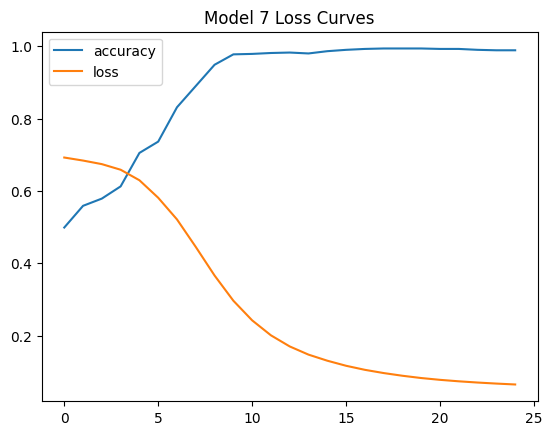

In [61]:
# I am now interested in the visualization of the Model 7 loss curves. In order to see them, I'll use pandas. 

import pandas as pd

pd.DataFrame(history_7.history).plot()
plt.title("Model 7 Loss Curves")


Many elements could be involved in the rate of decrease of the loss function :
1. Callback : extra piece of funtionality that you we add *while* the model is training.
2. Modified loss curves plot
3. Another model

The callback will be the the main interest of my next model.

In [ ]:
# Model 8 (Introduction of a callback in my model)

tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_8.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Create a learning rate callback

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_8 = model_8.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

In [63]:
# Let's see the evolution of my model 8's main elements.

pd.DataFrame(history_8.history)

,accuracy,loss,learning_rate
0,0.48625,0.714596,0.000100
1,0.49000,0.712880,0.000112
2,0.48750,0.711095,0.000126
3,0.49125,0.709248,0.000141
4,0.49375,0.707339,0.000158
...,...,...,...
95,0.48875,0.779847,5.623413
96,0.48375,0.828860,6.309574
97,0.48625,0.881233,7.079458
98,0.48625,0.933113,7.943282


Text(0.5, 1.0, 'Model 8 Loss Curves')

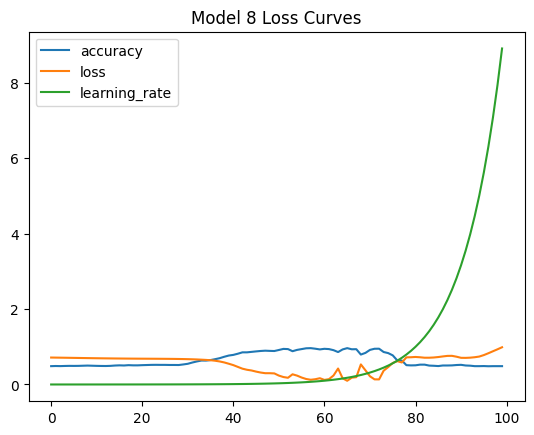

In [64]:
# Visualization of the model 8 Loss curves.

pd.DataFrame(history_8.history).plot()
plt.title("Model 8 Loss Curves")

Compared to model 7, only a callback has been added and still, the model is performing very badly (<0.5 accuracy after 100 epochs and the loss function continually increases). It raises an issue : the callback may have brought an uncertainty that causes the model to underperform. It is absolutely crucial in the following to chose the most ideal learning rate that will allow the model to perform in a good way. 

In order to do that, let's plot the learning rate's effect on loss function. 

Text(0.5, 1.0, 'Learning rate vs Loss')

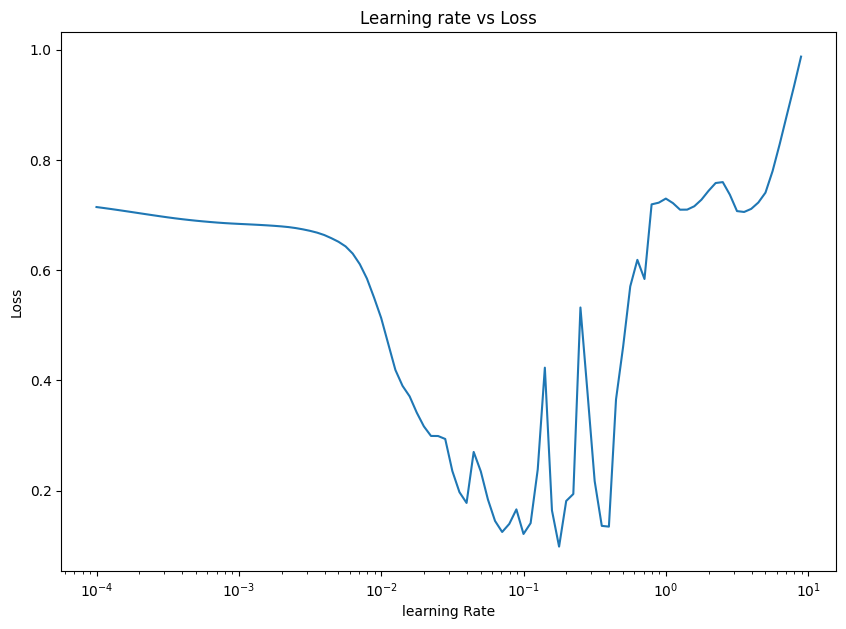

In [65]:
# Plot the learning rate vs loss

lrs = 1e-4 * 10**(tf.range(100)/20)
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_8.history["loss"])
plt.xlabel("learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

The best learning rate is the rate that makes the loss function drops dramatically. From the plot, we notice that this rate is between 0.001 and 0.01. 
More precisely, this rate is around 0.05 on the graph so I am going to work with this one for the next model.

In [ ]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_9.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
                metrics=["accuracy"])

history_9 = model_9.fit(X_train, y_train, epochs=20)

In [74]:
model_9.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9981 - loss: 0.0187 


[0.020255673676729202, 0.9950000047683716]

The results speak for themselves ... the callback has allowed used us to identify the learning rate that provide the best results for this Neural Network. 
Let's now plot the model 9 loss curves to see how different it is from the model 8.

Text(0.5, 1.0, 'Model 9 Loss Curves')

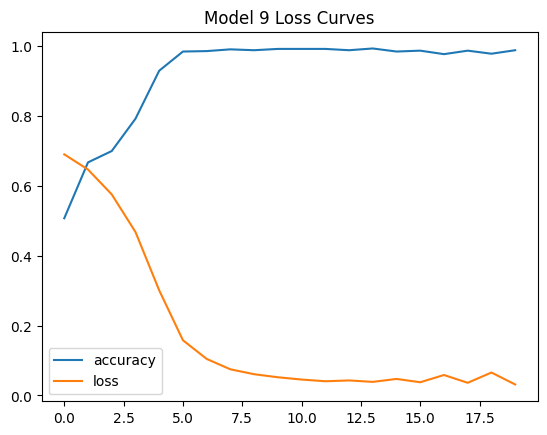

In [75]:
# Visualization of the Model 9 Loss Curves.

pd.DataFrame(history_9.history).plot()
plt.title("Model 9 Loss Curves")

The changes are drastically different from those of model 8!

To finish, let's plot the model 9's decision boundaries of training and test data.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step
doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step
doing binary classification


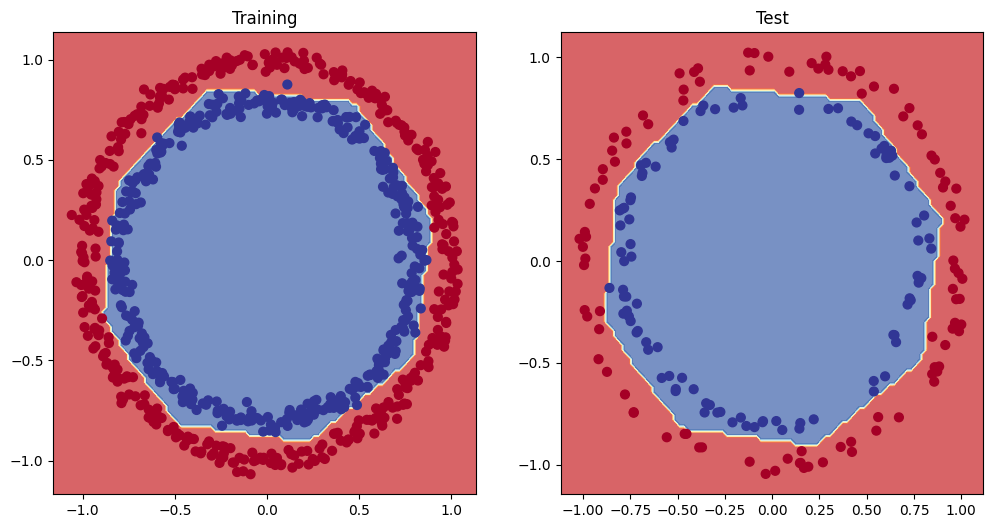

In [76]:
# Plotting of the model 9's decision boundaries.

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Training")
plot_decision_boundary(model_9, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_9, X=X_test, y=y_test)

There exists a lot more classification evaluation methods than the decision boundary : classification report, F1-Score, ... but in the last section, I am going to study a particluar one : the confusion matrix.

### CONFUSION MATRIX

The confusion matrix links the predicted and true labels in a way that visually allows to see the model's performance. 
In the following, I will generate a confusion matrix on model 9.

Before working on the confusion matrix, I have to convert the prediction labels in probability form (so 0 or 1) which is the standard ouput of activation functions. Before this convert, the predicted label in that case was a (200, 1) shape tensor of float32 objects. 


In [79]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_9.predict(X_test)

# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[101,   0],
       [  1,  98]])

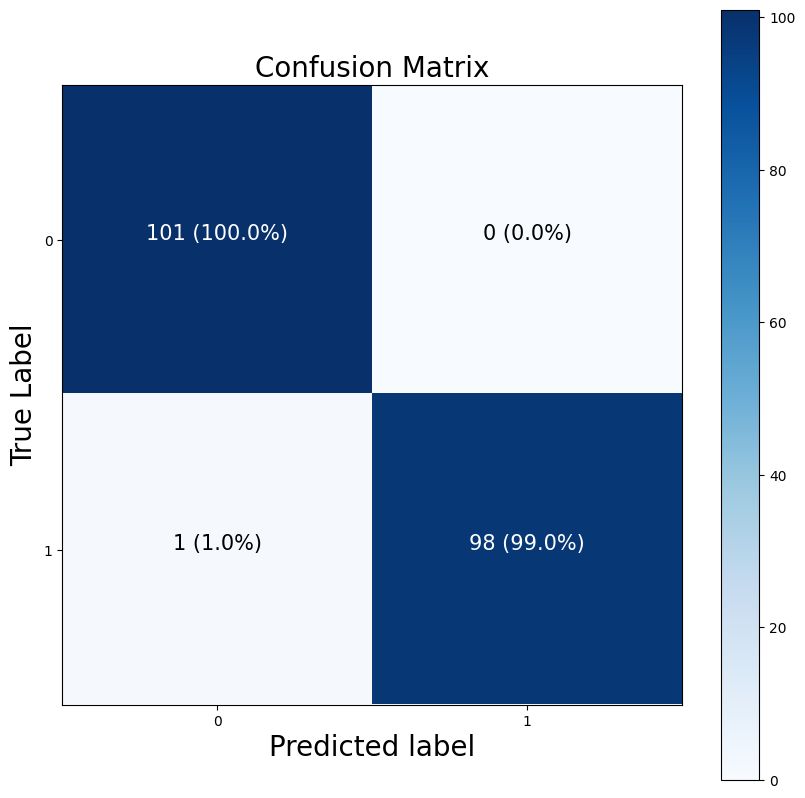

In [80]:
# This code has been generated with the help from ChatGPT. It could be modified to fit any model but I use it in that case for my model 9.

import itertools

figsize=(10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] 
n_classes = cm.shape[0]

# Let's make it prettier
fig, ax = plt.subplots(figsize=figsize)

# Create matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes 
classes = False

if classes:
    lebels = classes
else:
    labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True Label",
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels)

# Set x-axis to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=15)

On the 200 testing data inputs, the model 9 has made only one mistake by predicting a false 0 (y_true = 1 and y_pred = 0).
Apart from that, the model is perfect.


THANK YOU FOR HAVING FOLLOWED ME TILL THE END !